In [1]:
import pandas as pd
 
df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})
 
print(df)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm  grade_level  \
0  bachelors            1         4           10        155            8   
1  bachelors            2         3           10        151            8   
2  bachelors            3         4            8        160            8   
3    masters            3         3            8        160            8   
4    masters            3         2            6        156            8   
5    masters            4         3            6        150            8   
6    masters            3         2            8        164            8   
7        phd            4         2            8        151            8   
8        phd            5         1           10        158            8   
9        phd            5         1           10        152            8   

   exam_score  
0          71  
1          72  
2          78  
3          79  
4          85  
5          86  
6          92  
7          93  
8          99  
9  

In [2]:
# Our goal is to use the data to predict how well each student will perform on the exam. 
# Thus, our target variable is exam_score and the remaining 6 variables are our features. 
# We’ll prepare the data by separating the features matrix (X) and the target vector (y):

In [4]:
X = df.drop(columns=['exam_score'])
print(X)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm  grade_level
0  bachelors            1         4           10        155            8
1  bachelors            2         3           10        151            8
2  bachelors            3         4            8        160            8
3    masters            3         3            8        160            8
4    masters            3         2            6        156            8
5    masters            4         3            6        150            8
6    masters            3         2            8        164            8
7        phd            4         2            8        151            8
8        phd            5         1           10        158            8
9        phd            5         1           10        152            8


In [6]:
y = df['exam_score']
print(y)

0     71
1     72
2     78
3     79
4     85
5     86
6     92
7     93
8     99
9    100
Name: exam_score, dtype: int64


# Variance threshold

In [ ]:
# One of the most basic filter methods is to use a variance threshold to 
# remove any features that have little to no variation in their values. 
# This is because features with low variance do not contribute much information to a model. 
# Since variance can only be calculated on numeric values, this method only works on 
#quantitative features. That said, we may also want to remove categorical features 
#for which all or a majority of the values are the same. 
# To do that, we would need to dummy code the categorical variables first.

In [7]:
X_num = X.drop(columns=['edu_goal'])

In [ ]:
# We use VarianceThreshold class from scikit-learn to help remove the low-variance features
# from X_num. By default, it drops all features with zero variance, but we can adjust the 
# threshold during class instantiation using the threshold parameter if we want to allow 
# some variation.

In [8]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0) # 0 is default

In [12]:
print(selector.fit_transform(X_num))
# The .fit_transform() method returns the filtered features as a numpy array. 

[[  1   4  10 155]
 [  2   3  10 151]
 [  3   4   8 160]
 [  3   3   8 160]
 [  3   2   6 156]
 [  4   3   6 150]
 [  3   2   8 164]
 [  4   2   8 151]
 [  5   1  10 158]
 [  5   1  10 152]]


In [ ]:
# grade_level is removed. 

In [ ]:
# one downside of working with numpy arrays as compared to pandas DataFrame is that 
# we lose information like column headings, making the data harder to visually inspect. 

In [13]:
# .get_support() can return the indices of the selected features. 
print(selector.get_support(indices=True))

[0 1 2 3]


In [15]:
# Use indices to get the corresponding column names of selected features
num_cols = list(X_num.columns[selector.get_support(indices=True)])
print(num_cols)

['hours_study', 'hours_TV', 'hours_sleep', 'height_cm']


In [17]:
X_num = X_num[num_cols]
print(X_num)

   hours_study  hours_TV  hours_sleep  height_cm
0            1         4           10        155
1            2         3           10        151
2            3         4            8        160
3            3         3            8        160
4            3         2            6        156
5            4         3            6        150
6            3         2            8        164
7            4         2            8        151
8            5         1           10        158
9            5         1           10        152


In [19]:
# Finally, to obtain our entire features DataFrame
X=X[['edu_goal']+num_cols]
print(X)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm
0  bachelors            1         4           10        155
1  bachelors            2         3           10        151
2  bachelors            3         4            8        160
3    masters            3         3            8        160
4    masters            3         2            6        156
5    masters            4         3            6        150
6    masters            3         2            8        164
7        phd            4         2            8        151
8        phd            5         1           10        158
9        phd            5         1           10        152


# Pearson’s correlation (Finding the correlation between variables)

In [ ]:
# Correlation between features
# When two features are highly correlated with each other. Keep one in the model.

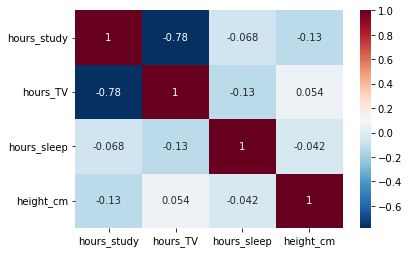

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_num.corr(method = 'pearson') # 'pearson' is default

sns.heatmap(corr_matrix,annot=True,cmap='RdBu_r')
plt.show()

In [ ]:
# Let’s define high correlation as having a coefficient of greater than 0.7 or less than -0.7.
# We can loop through the correlation matrix to identify the highly correlated variables:

In [25]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>0.7:
            print(corr_matrix.columns[i],corr_matrix.columns[j],corr_matrix.iloc[i,j])

hours_TV hours_study -0.780763315142435


In [ ]:
# As seen, hours_TV appears to be highly negatively correlated with hours_study — 
# a student who watches a lot of TV tends to spend fewer hours studying, and vice versa. 
# Because they provide redundant information, we can choose to remove one of those variables. 
# To decide which one, we can look at their correlation with the target variable, 
# then remove the one that is less associated with the target. 

# Correlation between feature and target

In [26]:
X_y = X_num.copy()
X_y['exam_score'] = y

print(X_y)

   hours_study  hours_TV  hours_sleep  height_cm  exam_score
0            1         4           10        155          71
1            2         3           10        151          72
2            3         4            8        160          78
3            3         3            8        160          79
4            3         2            6        156          85
5            4         3            6        150          86
6            3         2            8        164          92
7            4         2            8        151          93
8            5         1           10        158          99
9            5         1           10        152         100


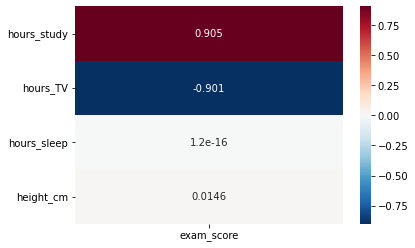

In [27]:
corr_matrix = X_y.corr()

# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['exam_score']].drop(labels=['exam_score'])
 
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [28]:
X = X.drop(columns=['hours_TV'])
 
print(X)

    edu_goal  hours_study  hours_sleep  height_cm
0  bachelors            1           10        155
1  bachelors            2           10        151
2  bachelors            3            8        160
3    masters            3            8        160
4    masters            3            6        156
5    masters            4            6        150
6    masters            3            8        164
7        phd            4            8        151
8        phd            5           10        158
9        phd            5           10        152


# An alternative approach

In [ ]:
# Instead of generating the full correlation matrix, we could use the f_regression()function
# from scikit-learn to find the F-statistic for a model with each predictor on its own.
# The F-statistic will be larger (and p-value will be smaller) for predictors that are more 
# highly correlated with the target variable, thus it will perform the same filtering:

In [29]:
from sklearn.feature_selection import f_regression
 
print(f_regression(X_num, y))

# The function returns the F-statistic in the first array and the p-value in the second.

(array([3.61362007e+01, 3.44537037e+01, 0.00000000e+00, 1.70259066e-03]), array([3.19334945e-04, 3.74322763e-04, 1.00000000e+00, 9.68097878e-01]))


# Mutual information: rank and select the top features.

In [34]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
 
# Create copy of `X` for encoded version
X_enc = X.copy()
X_enc['edu_goal'] = le.fit_transform(X['edu_goal'])
 
print(X_enc)

   edu_goal  hours_study  hours_sleep  height_cm
0         0            1           10        155
1         0            2           10        151
2         0            3            8        160
3         1            3            8        160
4         1            3            6        156
5         1            4            6        150
6         1            3            8        164
7         2            4            8        151
8         2            5           10        158
9         2            5           10        152


In [35]:
from sklearn.feature_selection import mutual_info_regression
 
print(mutual_info_regression(X_enc, y, random_state=68))

# This function is used because our target variable is continuous, 
# but if we had a discrete target variable, we would use mutual_info_classif()

[0.50396825 0.40896825 0.06896825 0.        ]


In [ ]:
# edu_goal is still discrete and not numeric. 
# we need to tell mutual_info_regression() which features are discrete by providing their 
# index positions using the discrete_features parameter:

In [36]:
print(mutual_info_regression(X_enc, y, discrete_features=[0], random_state=68))

[0.75563492 0.38896825 0.18563492 0.        ]


In [ ]:
# From the results, we can also see that there is 0 mutual information between height_cm and 
# exam_score, suggesting that these variables are largely independent. 
# This is consistent with what we saw earlier with Pearson’s correlation, 
# where the correlation coefficient between them is very close to 0 as well.

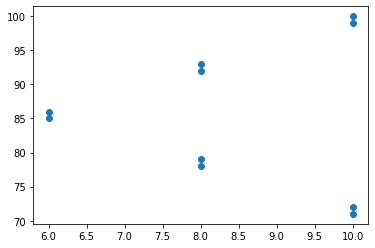

In [39]:
# THe mutual information between hours_sleep and exam_score is a positive value, even though
# their Pearson's correlation coefficient is 0. The answer becomes more clear when
# we plot the relationship between hours_sleep and exam_score.

plt.scatter(X_enc['hours_sleep'],y)

# As seen, the relationship between hours_sleep and exam_score is not linear. 
# That is why it is detected using mutual information but not Pearson's correlation coefficient.


In [41]:
# Finally, using the SelectKBest class from scikit-learn to help pick out the top K features
# with the highest ranked scores.

from sklearn.feature_selection import SelectKBest
from functools import partial


In [42]:
score_func = partial(mutual_info_regression, discrete_features=[0], random_state=68)

In [43]:
# Select top 3 features with the most mutual information

selection = SelectKBest(score_func=score_func, k=3)
 
print(selection.fit_transform(X_enc, y))

[[ 0  1 10]
 [ 0  2 10]
 [ 0  3  8]
 [ 1  3  8]
 [ 1  3  6]
 [ 1  4  6]
 [ 1  3  8]
 [ 2  4  8]
 [ 2  5 10]
 [ 2  5 10]]


In [44]:
# As seen above, we selected the top 3 features based on mutual information, 
# thus dropping height_cm. Like VarianceThreshold, 
# SelectKBest also offers the .get_support() method that returns the indices of the selected 
# features, so we could subset our original features DataFrame:

X = X[X.columns[selection.get_support(indices=True)]]
 
print(X)

    edu_goal  hours_study  hours_sleep
0  bachelors            1           10
1  bachelors            2           10
2  bachelors            3            8
3    masters            3            8
4    masters            3            6
5    masters            4            6
6    masters            3            8
7        phd            4            8
8        phd            5           10
9        phd            5           10


In [ ]:
# The other two factos 'hours_sleep' and 'height_cm' don't seem to correlate with exam_score.
# 